## Tidy Data Project: Federal Research and Development Budgets

This is the Jupiter Notebook for my Tidy Data Project, using the data file regarding the federal research and development budgets across different government departments.

#### Section One: Data Cleaning and Tidying Process

In tyding the data, I must first define my dataframe

In [74]:
import pandas as pd # import pandas dictionary to be referred to later
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import squarify
from pypalettes import load_cmap
from highlight_text import fig_text

df_fedrd = pd.read_csv('fed_rd_year&gdp.csv') # define dataframe

Next, I need to melt my dataframe such that the different variables are defined. This step is what reorients the columns such that the years and GDPs, which are values, are not correctly different rows. It must still be split such that the year and GDP variables are different columns. 

In [75]:
df_fedrd_melted = pd.melt(df_fedrd,
                          id_vars = 'department', # holds constant the column for department
                          value_vars = df_fedrd.columns[1:], # selects all the columns to be reoriented
                          var_name = 'Year_GDP', # renames the column now containing the previous column names
                          value_name='Research and Development Budget') #names the column containing all of the values from the original untidy dataframe

df_fedrd_melted

,department,Year_GDP,Research and Development Budget
0,DHS,1976_gdp1790000000000.0,NaN
1,DOC,1976_gdp1790000000000.0,8.190000e+08
2,DOD,1976_gdp1790000000000.0,3.569600e+10
3,DOE,1976_gdp1790000000000.0,1.088200e+10
4,DOT,1976_gdp1790000000000.0,1.142000e+09
...,...,...,...
583,NIH,2017_gdp19177000000000.0,3.305200e+10
584,NSF,2017_gdp19177000000000.0,6.040000e+09
585,Other,2017_gdp19177000000000.0,1.553000e+09
586,USDA,2017_gdp19177000000000.0,2.625000e+09


Now, I still need to split the dataframe such that the gdp and year are different columns, with correct formatting

In [76]:
df_fedrd_melted[['Year','GDP']] = df_fedrd_melted['Year_GDP'].str.split('_', expand=True) # splits the column with two variables into two columns, expand=true makes them two columns instead of a list of two variables
df_fedrd_melted_tidy = df_fedrd_melted.drop('Year_GDP', axis=1) # gets rid of messy/unwanted column
df_fedrd_melted_tidy['GDP'] = df_fedrd_melted_tidy['GDP'].str.replace('gdp','') # fixes formatting such that GDP column does not contain unnecessary information
df_fedrd_melted_tidy

,department,Research and Development Budget,Year,GDP
0,DHS,NaN,1976,1790000000000.0
1,DOC,8.190000e+08,1976,1790000000000.0
2,DOD,3.569600e+10,1976,1790000000000.0
3,DOE,1.088200e+10,1976,1790000000000.0
4,DOT,1.142000e+09,1976,1790000000000.0
...,...,...,...,...
583,NIH,3.305200e+10,2017,19177000000000.0
584,NSF,6.040000e+09,2017,19177000000000.0
585,Other,1.553000e+09,2017,19177000000000.0
586,USDA,2.625000e+09,2017,19177000000000.0


The next step is to tidy the data with regards to the missing data, as for the first few years there is no recorded information regarding the research and development budget of the DHS. What is missing from this dataset, nore specifically, is the research and development budget for the department DHS (that is the department for homeland security), from 1976 to 2001. This makes sense because the department of homeland security was created in 2002. Thus, this value is missing at random. It is not dependent on the value of the budget itself but instead dependent on a different variable. Thus, what makes the most sense with regards to this missing data is a deletion of the missing observations, or null values.

In [ ]:
df_fedrd_melted_tidy = df_fedrd_melted_tidy.dropna() # .dropna() removes all of the null values from the data frame
df_fedrd_melted_tidy

,department,Research and Development Budget,Year,GDP
1,DOC,8.190000e+08,1976,1790000000000.0
2,DOD,3.569600e+10,1976,1790000000000.0
3,DOE,1.088200e+10,1976,1790000000000.0
4,DOT,1.142000e+09,1976,1790000000000.0
5,EPA,9.680000e+08,1976,1790000000000.0
...,...,...,...,...
583,NIH,3.305200e+10,2017,19177000000000.0
584,NSF,6.040000e+09,2017,19177000000000.0
585,Other,1.553000e+09,2017,19177000000000.0
586,USDA,2.625000e+09,2017,19177000000000.0


#### Section Two: Analysis of the Data

##### Part One: Pivot Tables and Aggregation Functions

Below, I am creating a pivot table which represents the mean GDP and the mean Research and Development Budget for each department 

pivot table 
https://stackoverflow.com/questions/15891038/change-column-type-in-pandas

In [83]:
# in order to calculate the mean and use aggregation functions, the values need to be numeric datatypes, cannot be objects
df_fedrd_melted_tidy.loc[:,'Research and Development Budget'] = pd.to_numeric(df_fedrd_melted_tidy['Research and Development Budget']) 
df_fedrd_melted_tidy.loc[:,'GDP'] = pd.to_numeric(df_fedrd_melted_tidy['GDP'])
df_fedrd_melted_tidy.loc[:,'Year'] = pd.to_numeric(df_fedrd_melted_tidy['Year'])

In [84]:
pivot_table_gdp_rdbudget = pd.pivot_table(df_fedrd_melted_tidy, values = ['Research and Development Budget', 'GDP'], index = 'department', aggfunc = 'mean')
pivot_table_gdp_rdbudget

,GDP,Research and Development Budget
department,,
DHS,1.499731e+13,9.948750e+08
DOC,9.175119e+12,1.231500e+09
DOD,9.175119e+12,6.468519e+10
DOE,9.175119e+12,1.188338e+10
DOT,9.175119e+12,9.177857e+08
EPA,9.175119e+12,7.504286e+08
HHS,9.175119e+12,2.229676e+10
Interior,9.175119e+12,9.005714e+08
NASA,9.175119e+12,1.214026e+10


##### Part Two: Visualizations

tree map for replacing bar chart - shows area instead of angles (for a specific year, distributuion of rd budget)
line chart

https://stackoverflow.com/questions/51004029/create-a-new-dataframe-based-on-rows-with-a-certain-value

In [80]:
df_fedrd_1976 = df_fedrd_melted_tidy[df_fedrd_melted_tidy['Year']==1976]
df_fedrd_1976

,department,Research and Development Budget,Year,GDP
1,DOC,8.190000e+08,1976,1.790000e+12
2,DOD,3.569600e+10,1976,1.790000e+12
3,DOE,1.088200e+10,1976,1.790000e+12
4,DOT,1.142000e+09,1976,1.790000e+12
5,EPA,9.680000e+08,1976,1.790000e+12
6,HHS,9.226000e+09,1976,1.790000e+12
7,Interior,1.152000e+09,1976,1.790000e+12
8,NASA,1.251300e+10,1976,1.790000e+12
9,NIH,8.025000e+09,1976,1.790000e+12
10,NSF,2.372000e+09,1976,1.790000e+12


/opt/anaconda3/envs/streamlitenv/lib/python3.12/site-packages/squarify/__init__.py:231: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap()


<function matplotlib.pyplot.show(close=None, block=None)>

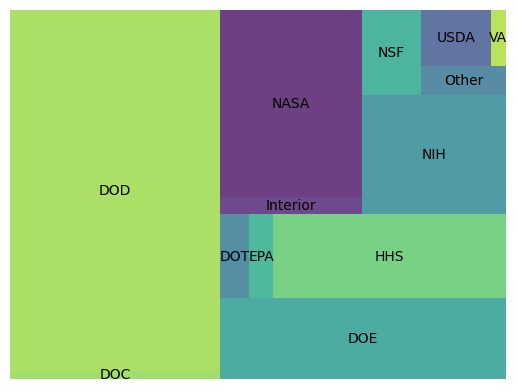

In [81]:
squarify.plot(sizes=df_fedrd_1976['Research and Development Budget'], label=df_fedrd_1976['department'], alpha=0.8)
plt.axis('off')
plt.show